In [1]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Univariate Exploratory Data Analysis for Challenge 2 - Seasonality

The clean dataset (only questions in English, only including Kenya and Uganda) contains 2218481 questions coming from 438766 unique users.

In [2]:
df = pd.read_csv("data/clean/EN_questions.csv")
df_ke = pd.read_csv("data/clean/ke_EN_questions.csv")
df_ug = pd.read_csv("data/clean/ug_EN_questions.csv")

In [3]:
df.shape

(2218481, 9)

In [4]:
df.dtypes

question_id       int64
user_id           int64
country          object
topics           object
question_type    object
text             object
clean_text       object
date             object
season           object
dtype: object

In [5]:
df['user_id'].nunique()

438766

In [6]:
df.head()

,question_id,user_id,country,topics,question_type,text,clean_text,date,season
0,3849084,6642,ke,"('rabbit',)",pests_diseases,Q-i have stock rabbit's urine for 5 weeks mash...,qi have stock rabbits urine for weeks mashamba...,2017-11-22 12:25:10+00:00,short_rains
1,3849098,526375,ug,"('poultry',)",soil_fertility,Q J Have Mi 10000 Can J Start Aproject Of Pout...,q j have mi can j start aproject of poutry how...,2017-11-22 12:25:12+00:00,planting
2,3849100,237506,ke,"('pig', 'coconut')",planting,WHERE DO I GET SEEDS OF COCONUT?,where do i get seeds of coconut,2017-11-22 12:25:12+00:00,short_rains
3,3849129,54426,ke,"('plant',)",planting,Q#.Which plant has omega3?,qwhich plant has omega,2017-11-22 12:25:16+00:00,short_rains
4,3849153,340091,ug,"('tomato',)",planting,Q Am Jackson From Ibanda If Want To Grow Tomat...,q am jackson from ibanda if want to grow tomat...,2017-11-22 12:25:18+00:00,planting


## Questions per country

In [8]:
country_table = pd.crosstab(index = df['country'],
                              columns="count")
country_table

col_0,count
country,
ke,1290839
ug,927642


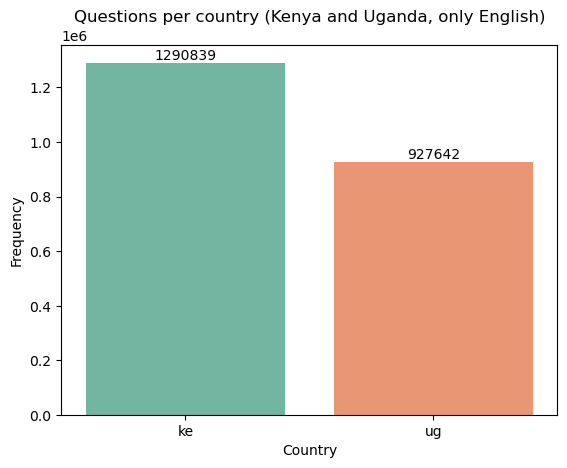

In [31]:
country_frequency = df['country'].value_counts()
ax = sns.barplot(x=country_frequency.index, y=country_frequency.values , palette="Set2")
for container in ax.containers:
    ax.bar_label(container,fmt="%.0f")
plt.title("Questions per country (Kenya and Uganda, only English)")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.savefig("images/questions_per_country.jpg")
plt.show();

## Questions per season

In [13]:
seasons_table = pd.crosstab(index = df['season'],
                              columns="count")
seasons_table

col_0,count
season,
harvesting,931975
long_rains,324367
no_season,130179
planting,478794
short_rains,353166


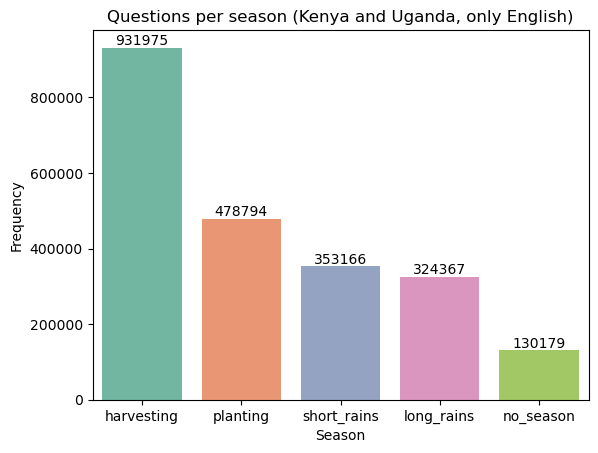

In [32]:
seasons_frequency = df['season'].value_counts()
ax = sns.barplot(x=seasons_frequency.index, y=seasons_frequency.values , palette="Set2")
for container in ax.containers:
    ax.bar_label(container,fmt="%.0f")
plt.title("Questions per season (Kenya and Uganda, only English)")
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.savefig("images/questions_per_season.jpg")
plt.show();

### Questions per season in Kenya

In [29]:
ke_seasons_table = pd.crosstab(index = df_ke['season'],
                              columns="count")
ke_seasons_table

col_0,count
season,
harvesting,483127
long_rains,324367
no_season,130179
short_rains,353166


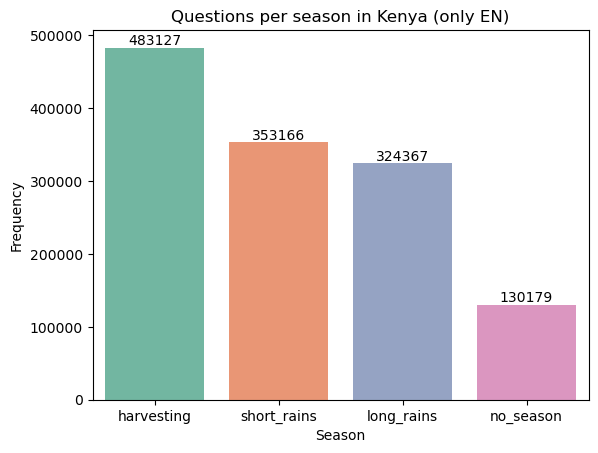

In [44]:
ke_seasons_frequency = df_ke['season'].value_counts()
ax = sns.barplot(x=ke_seasons_frequency.index, y=ke_seasons_frequency.values , palette="Set2")
for container in ax.containers:
    ax.bar_label(container,fmt="%.0f")
plt.title("Questions per season in Kenya (only EN)")
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.savefig("images/questions_per_season_kenya.jpg")
plt.show();

### Questions per season in Uganda

In [31]:
ug_seasons_table = pd.crosstab(index = df_ug['season'],
                              columns="count")
ug_seasons_table

col_0,count
season,
harvesting,448848
planting,478794


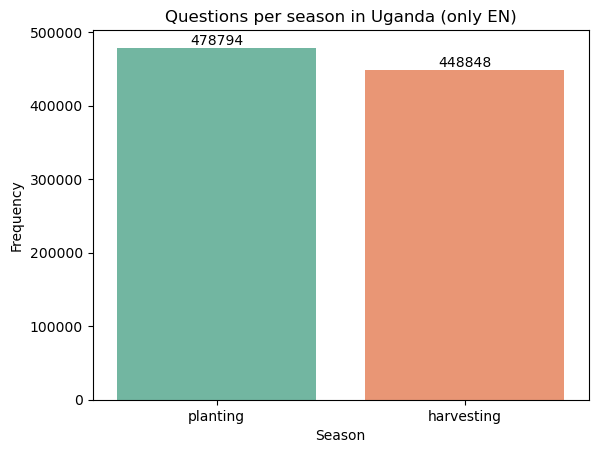

In [45]:
ug_seasons_frequency = df_ug['season'].value_counts()
ax = sns.barplot(x=ug_seasons_frequency.index, y=ug_seasons_frequency.values , palette="Set2")
for container in ax.containers:
    ax.bar_label(container,fmt="%.0f")
plt.title("Questions per season in Uganda (only EN)")
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.savefig("images/questions_per_season_uganda.jpg")
plt.show();

## Topics

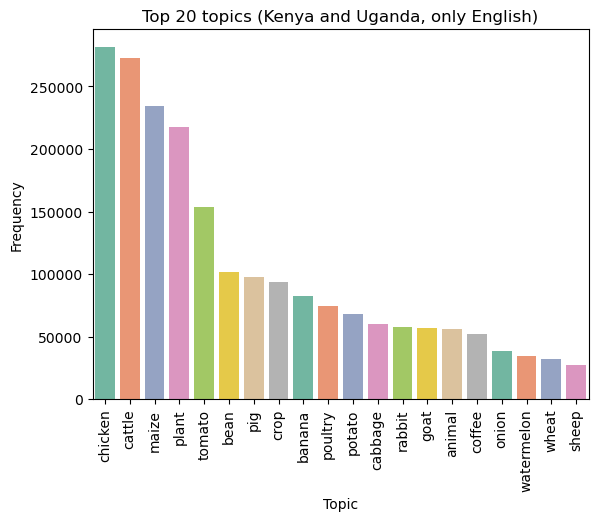

In [12]:
df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('topics')

topics_frequency = df_exploded['topics'].value_counts()

top_n = 20
top_topics = topics_frequency.head(top_n)

sns.barplot(x=top_topics.index, y=top_topics.values , palette="Set2")
plt.title(f"Top {top_n} topics (Kenya and Uganda, only English)")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.savefig("images/top20topics.jpg")
plt.show();

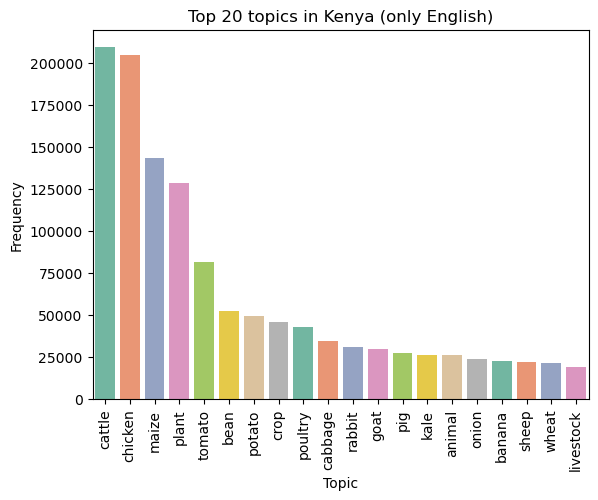

In [74]:
df_ke['topics'] = df_ke['topics'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_ke_exploded = df_ke.explode('topics')

ke_topics_frequency = df_ke_exploded['topics'].value_counts()

top_n = 20
ke_top_topics = ke_topics_frequency.head(top_n)

sns.barplot(x=ke_top_topics.index, y=ke_top_topics.values , palette="Set2")
plt.title(f"Top {top_n} topics in Kenya (only English)")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show();

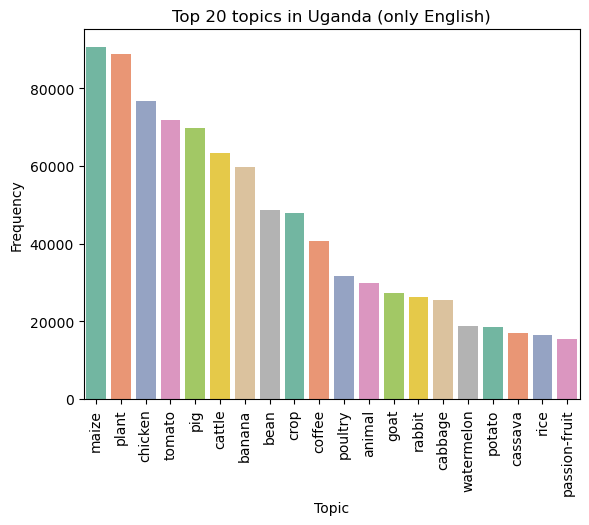

In [75]:
df_ug['topics'] = df_ug['topics'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_ug_exploded = df_ug.explode('topics')

ug_topics_frequency = df_ug_exploded['topics'].value_counts()

top_n = 20
ug_top_topics = ug_topics_frequency.head(top_n)

sns.barplot(x=ug_top_topics.index, y=ug_top_topics.values , palette="Set2")
plt.title(f"Top {top_n} topics in Uganda (only English)")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show();

## Question types

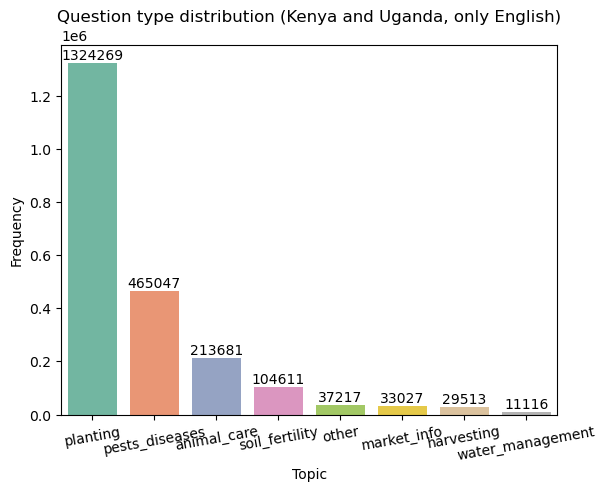

In [23]:
types_frequency = df['question_type'].value_counts()

ax = sns.barplot(x=types_frequency.index, y=types_frequency.values , palette="Set2")
for container in ax.containers:
    ax.bar_label(container,fmt="%.0f")
plt.title(f"Question type distribution (Kenya and Uganda, only English)")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.xticks(rotation=10)
plt.savefig("images/question_type_distribution.jpg")
plt.show();

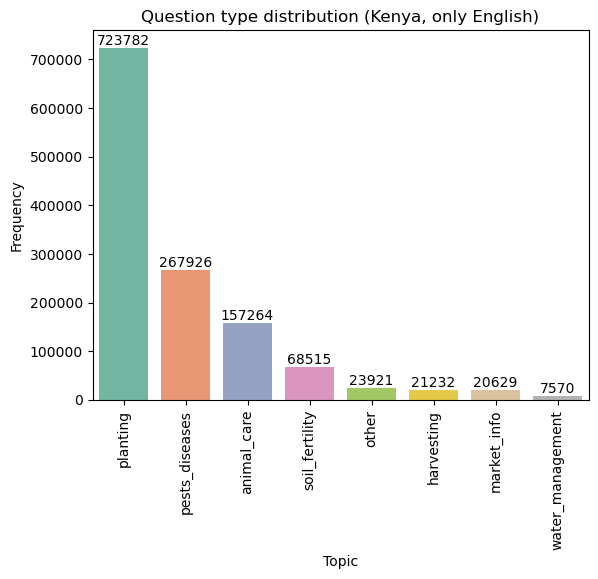

In [17]:
ke_types_frequency = df_ke['question_type'].value_counts()

ax = sns.barplot(x=ke_types_frequency.index, y=ke_types_frequency.values , palette="Set2")
for container in ax.containers:
    ax.bar_label(container,fmt="%.0f")
plt.title(f"Question type distribution (Kenya, only English)")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show();

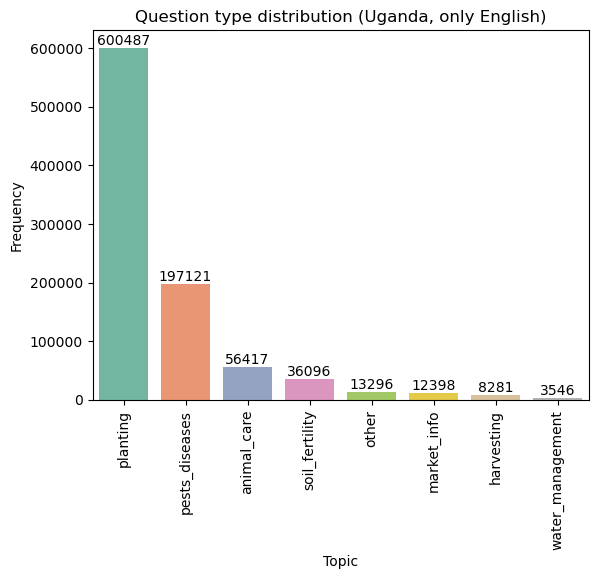

In [19]:
ug_types_frequency = df_ug['question_type'].value_counts()

ax = sns.barplot(x=ug_types_frequency.index, y=ug_types_frequency.values , palette="Set2")
for container in ax.containers:
    ax.bar_label(container,fmt="%.0f")
plt.title(f"Question type distribution (Uganda, only English)")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show();